In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls

Data                   Data_Exploration.ipynb README.md              features.txt


In [3]:
import csv
fi=open('Data/redditSubmissions.csv')
r=csv.reader(fi)


In [4]:
data=list(r)

In [5]:
len(data)

132309

In [6]:
data.pop(0)

['#image_id',
 'unixtime',
 'rawtime',
 'title',
 'total_votes',
 'reddit_id',
 'number_of_upvotes',
 'subreddit',
 'number_of_downvotes',
 'localtime',
 'score',
 'number_of_comments',
 'username']

In [7]:
data[0:3]

[['0',
  '1333172439',
  '2012-03-31T12:40:39.590113-07:00',
  "And here's a downvote.",
  '63470',
  'rmqjs',
  '32657',
  'funny',
  '30813',
  '1333197639',
  '1844',
  '622',
  'Animates_Everything'],
 ['0',
  '1333178161',
  '2012-03-31T14:16:01.093638-07:00',
  'Expectation',
  '35',
  'rmun4',
  '29',
  'GifSound',
  '6',
  '1333203361',
  '23',
  '3',
  'Gangsta_Raper'],
 ['0',
  '1333199913',
  '2012-03-31T20:18:33.192906-07:00',
  'Downvote',
  '41',
  'rna86',
  '32',
  'GifSound',
  '9',
  '1333225113',
  '23',
  '0',
  'Gangsta_Raper']]

In [8]:
images=[x[0] for x in data]
len(set(images))

16736

In [9]:
print data[0]

['0', '1333172439', '2012-03-31T12:40:39.590113-07:00', "And here's a downvote.", '63470', 'rmqjs', '32657', 'funny', '30813', '1333197639', '1844', '622', 'Animates_Everything']


Unique number of images analysed=16736

In [10]:
import matplotlib.pyplot as plt

In [11]:
data.pop(53033)

['20089', '']

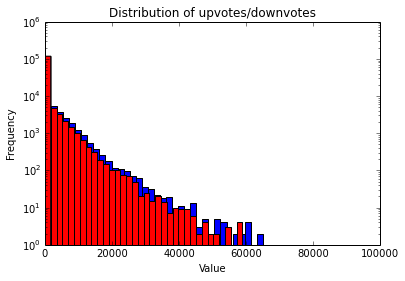

In [12]:
upvotes=[int(x[6]) for x in data]
downvotes=[int(x[8]) for x in data]
plt.hist(upvotes,log=True,bins=50,color='b')
plt.hist(downvotes,log=True,bins=50,color='r')
plt.title("Distribution of upvotes/downvotes")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [13]:
for i in range(len(data)):
    if int(data[i][6])>80000:
        print data[i]

['2713', '1349205792', '2012-10-02T19:23:12+00:00', 'Airline screwed up, a friend just posted this on Facebook.', '177103', '10tya8', '90396', 'funny', '86707', '1349205792', '3689', '3488', 'lepry']


In [14]:
for i in range(len(data)):
    if int(data[i][8])>80000:
        print data[i]

['2713', '1349205792', '2012-10-02T19:23:12+00:00', 'Airline screwed up, a friend just posted this on Facebook.', '177103', '10tya8', '90396', 'funny', '86707', '1349205792', '3689', '3488', 'lepry']


In [15]:
score=[upvotes[i]-downvotes[i] for i in xrange(len(upvotes))]

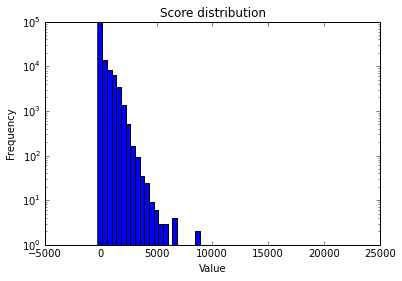

In [16]:
plt.hist(score,log=True,bins=50)
plt.title("Score distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [17]:
for i in range(len(score)):
    if score[i]>10000:
        print data[i]

['15566', '1327490824', '2012-01-25T18:27:04-07:00', 'So my little cousin posted on FB that he was bored and gave everyone his new phone number... (pic)', '114451', 'owx3v', '63392', 'funny', '51059', '1327516024', '12333', '1612', 'frackyou']
['20414', '1333422529', '2012-04-03T10:08:49-07:00', 'My friend calls him &quot;Mr Ridiculously Photogenic Guy&quot;', '92874', 'rrew0', '52391', 'pics', '40483', '1333447729', '11908', '2681', 'TheKoG']
['22478', '1343466356', '2012-07-28T16:05:56-07:00', 'The Bus Knight', '114964', 'xbfwb', '67767', 'funny', '47197', '1343491556', '20570', '1463', 'Robert_Houdin']
['6952', '1311262850', '2011-07-21T22:40:50-07:00', 'This is called humanity.', '62718', 'iwkkx', '36490', 'pics', '26228', '1311288050', '10262', '1514', 'freestylepopcorn']


In [18]:
for i in range(len(score)):
    if score[i]<-100:
        print data[i]

['1066', '1352725707', '2012-11-12T13:08:27+00:00', 'Picture of draining sink that looks like an eye [x-post from r/mildlyinteresting]', '282', '13277r', '80', 'pics', '202', '1352725707', '-122', '13', 'choc_is_back']
['12745', '1351687185', '2012-10-31T12:39:45+00:00', "Disney, you may have purchased Star Wars, but in a profound way, the mythos belongs to all of us. We're putting our trust in you, so please, make us proud. As a gesture of good faith, I have made this image to commemorate the occasion.", '870', '12e8u4', '303', 'movies', '567', '1351687185', '-264', '79', '']
['24407', '1359064672', '2013-01-24T21:57:52+00:00', "I actually hope this is a repost so I don't have to give Facebook credit.", '290', '177qzm', '89', 'funny', '201', '1359064672', '-112', '13', 'mtxrcr']


In [19]:
d={}
for x in data:
    if x[0] in d:
        d[x[0]]+=1
    else:
        d[x[0]]=1

In [20]:
import operator
max(d.iteritems(), key=operator.itemgetter(1))[0]

'6037'

In [21]:
d['6037']

166

In [22]:
resub=[]
for k in d.keys():
    resub.append(d[k])

Image resubmitted maximum times=6037,166 times

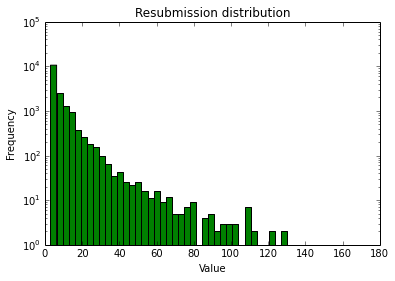

In [23]:
plt.hist(resub,log=True,bins=50,color='g')
plt.title("Resubmission distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [24]:
users=[x[12] for x in data]
len(set(users))

63338

No. of unique users=63338

In [25]:
u={}
for x in data:
    if x[12] in u:
        u[x[12]]+=1
    else:
        u[x[12]]=1

In [26]:
max(u.iteritems(), key=operator.itemgetter(1))[0]

''

In [27]:
u['']

20259

In [28]:
del u['']

In [29]:
max(u.iteritems(), key=operator.itemgetter(1))[0]

'Gangsta_Raper'

In [30]:
u['Gangsta_Raper']

5608

'Gangsta_Raper' posted 5608 times

In [31]:
user_posts=[]
for k in u.keys():
    user_posts.append(u[k])

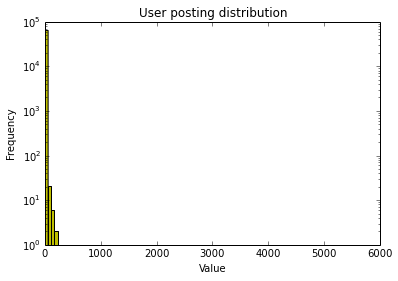

In [32]:
plt.hist(user_posts,log=True,bins=100,color='y')
plt.title("User posting distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

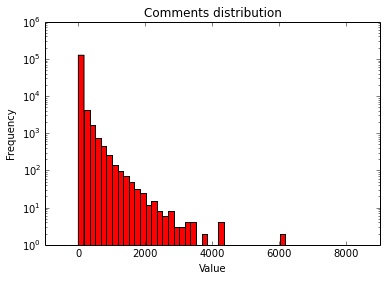

In [33]:
comments=[int(x[11]) for x in data]
plt.hist(comments,log=True,bins=50,color='r')
plt.title("Comments distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [34]:
for i in range(len(score)):
    if comments[i]>8000:
        print data[i]

['11682', '1316149015', '2011-09-16T11:56:55-07:00', 'Your superhero name is going to suck...', '7508', 'khxit', '4159', 'reddit.com', '3349', '1316174215', '810', '8357', 'spez']


Subreddit distribution

In [35]:
subreddit={}
for x in data:
    if x[7] in subreddit:
        subreddit[x[7]]+=1
    else:
        subreddit[x[7]]=0

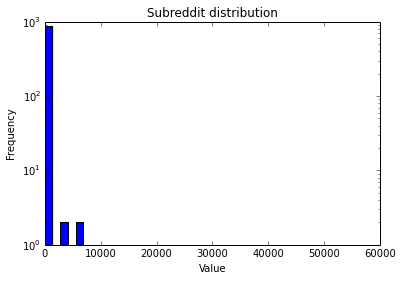

In [36]:
sreddit=[subreddit[x] for x in subreddit.keys()]
plt.hist(sreddit,log=True,bins=40,color='b')
plt.title("Subreddit distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [37]:
sub_reddit=[]
s_count=0
ignore=[]
i_count=0
for x in subreddit.keys():
    if subreddit[x]>20:
        sub_reddit.append(x)
        s_count+=subreddit[x]
    else:
        ignore.append(x)
        i_count+=subreddit[x]

In [38]:
len(sub_reddit),s_count,len(ignore),i_count

(57, 129387, 810, 2053)

In [39]:
# Assigning a label for each subreddit.
sub_reddit_label = dict(zip(sub_reddit, range(len(sub_reddit))))


# Prediction task- Predict which subreddit the post will be posted to 

# feature analysis #

In [40]:
import hashlib
import datetime
import re
import string
import pandas as pd
import time

In [41]:
def feature(datum):
    t=datum[2]
    tFormatted=datetime.datetime(int(t[0:4]),int(t[5:7]),int(t[8:10]),
                                     int(t[11:13]),int(t[14:16]),int(t[17:19]))
    title=datum[3]
    punctuations=re.findall(r"[.,!?;]",title)
    words=title.translate(string.maketrans("",""), string.punctuation).split(' ')  
    sentc=1
    wordc=len(words)
    charc= sum(len(w) for w in words)
    ari=int(4.71 * charc / wordc + 0.5 * wordc / sentc - 21.43)
    ariBucket=int(ari/3)
    feat=[]
    #feat.append(long(datum[0]))
    feat.append(int(time.time())-int(datum[1])) #unixtime
    feat.append(tFormatted.date().weekday()) #day ofthe week
    feat.append(tFormatted.hour) #hour of the day in local time
    feat.append(len(punctuations)*1.0/len(words)) #punctuation to word ratio
    feat.append(ari) #automatic readability index of title
    feat.append(ariBucket) #bucketed ari
    feat.append(len(datum[3]))
    #feat.append(hash(datum[3]))#hashed title -> replace with sentiment analysis
    #feat.append(datum[5])
    #feat.append(hash(datum[7]))#subreddit hashed
    #feat.append(datum[9])
    
    #feat.append(len(datum[12]))#username length
    feat.append(int(datum[10])) #Score
    feat.append(int(datum[11])) #Number of comments
    feat.append(1)
    return feat

In [42]:
# Assign a label to each subreddit. If it is one of the niche subreddits, then we assign it the last label.
def generate_label(datum):
    feat = 0
    datum_subreddit = datum[7]
    if datum_subreddit in sub_reddit_label:
        feat = sub_reddit_label[datum_subreddit]
    else:
        feat = len(sub_reddit_label)
    return feat;

In [43]:
#dataY=score
dataY=[generate_label(d) for d in data]
dataXF=[d for d in data]

In [44]:
from sklearn.cross_validation import train_test_split
train_X,test_X,trainY,testY=train_test_split(dataXF, dataY, test_size=0.20, random_state=0)

In [45]:
trainX=[feature(d) for d in train_X]
testX=[feature(d) for d in test_X]

In [46]:
#getting resubmission vector
image_dict={}
for x in train_X:
    if x[0] in image_dict:
        image_dict[x[0]].append(x[7])
    else:
        image_dict[x[0]]=[x[7]]
for i in xrange(len(trainX)):
    vec=[0]*(len(sub_reddit_label)+1)
    if train_X[i][0] in image_dict:
        for k in image_dict[train_X[i][0]]:
            if k in sub_reddit_label:
                vec[sub_reddit_label[k]]+=1
            else:
                vec[len(sub_reddit_label)]+=1
        f=[float(v)/len(image_dict[train_X[i][0]]) for v in vec]
        trainX[i].extend(f)
    else:
        trainX[i].extend(vec)

In [47]:
for i in xrange(len(testX)):
    vec=[0]*(len(sub_reddit_label)+1)
    if test_X[i][0] in image_dict:
        for k in image_dict[test_X[i][0]]:
            if k in sub_reddit_label:
                vec[sub_reddit_label[k]]+=1
            else:
                vec[len(sub_reddit_label)]+=1
        f=[float(v)/len(image_dict[test_X[i][0]]) for v in vec]
        testX[i].extend(f)
    else:
        testX[i].extend(map(float,vec))

In [ ]:
for x in testX:
    for i in x:
        if any(isinstance(i, list)):
            print i
            break
        

In [ ]:
test_t=testX[:2]
test_y=testY[:2]

In [48]:
len(testX[0])

68

#Standardizing the data

In [ ]:
dataXDF=pd.DataFrame(dataXF)
dataXDF=dataXDF.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
dataXDF[9]=1
dataXDF=dataXDF.replace([np.inf, -np.inf], np.nan)
dataXDF2=dataXDF.fillna(method="backfill")
dataX=dataXDF2.values.tolist()

In [ ]:
import math
trainX=dataX[0:int(len(dataX)*0.8)]
validX=dataX[int(len(dataX)*0.8)+1:int(len(dataX)*0.9)]
testX=dataX[int(len(dataX)*0.9)+1:len(dataX)]

trainY=dataY[0:int(len(dataY)*0.8)]
validY=dataY[int(len(dataY)*0.8)+1:int(len(dataY)*0.9)]
testY=dataY[int(len(dataY)*0.9)+1:len(dataY)]

idx = np.arange(len(trainX))
np.random.seed(13)
np.random.shuffle(idx)

trainX_std=[]
for i in xrange(len(trainX)):
    trainX_std.append(trainX[idx[i]])
trainY_std=[]
for i in xrange(len(trainY)):
    trainY_std.append(trainY[idx[i]])
    
trainX=trainX_std
trainY=trainY_std

In [ ]:
'''trainXDF=pd.DataFrame(trainX)
validXDF=pd.DataFrame(validX)
testXDF=pd.DataFrame(testX)

In [ ]:
'''testXDF.head()

In [ ]:
'''trainXDF=trainXDF.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
trainXDF[10]=1
validXDF=validXDF.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
validXDF[10]=1
testXDF=testXDF.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
testXDF[10]=1
trainXDF=trainXDF.replace([np.inf, -np.inf], np.nan)
validXDF=validXDF.replace([np.inf, -np.inf], np.nan)
testXDF=testXDF.replace([np.inf, -np.inf], np.nan)

In [ ]:
'''trainXDF2=trainXDF.fillna(method="backfill")
validXDF2=validXDF.fillna(method="backfill")
testXDF2=testXDF.fillna(method="backfill")

In [ ]:
'''type(trainXDF2)

In [ ]:
'''trainX=trainXDF2.values.tolist()
validX=validXDF2.values.tolist()
testX=testXDF2.values.tolist()

In [ ]:
print len(dataX)
print len(dataY)
print len(testX)
print len(testY)
print len(trainX)
print len(trainY)

In [ ]:
trainX[3]

## Trying Simple classification

In [ ]:
from sklearn import svm, metrics
classifier = svm.SVC()
classifier.fit(trainX, trainY)


In [ ]:
classifier.score(testX,testY)

In [ ]:
predictions = classifier.predict(testX)

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(testY, predictions)))
# print("Confusion matrix:\n%s" % metrics.confusion_matrix(testY, predictions))

## Classification with a different value of gamma

In [ ]:
classifier = svm.SVC(gamma=0.001)
classifier.fit(trainX, trainY)

In [ ]:
classifier.score(testX,testY)

In [ ]:
predictions = classifier.predict(testX)

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(testY, predictions)))
# print("Confusion matrix:\n%s" % metrics.confusion_matrix(testY, predictions))

In [ ]:
classifier.decision_function(trainX)[0]

## OneVsRest Classifier

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
classif = OneVsRestClassifier(svm.SVC(kernel='linear'))
classif.fit(trainX, trainY)

In [ ]:
classif.score(testX,testY)

## Slight modification with a different kernel

In [ ]:
classif = OneVsRestClassifier(svm.SVC())
classif.fit(trainX, trainY)

In [ ]:
classif.score(testX,testY)

In [ ]:
predictions = classif.predict(testX)

In [ ]:
predictions[0:10]

## Multi Class Logistic Regression

In [51]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()


In [ ]:
logistic.fit(trainX, trainY)

In [ ]:
logistic.score(testX, testY)

In [ ]:
predictions = logistic.predict(testX)

In [ ]:
predictions[1]

## One Vs Rest Multi Class Logistic Regression

In [52]:
from sklearn.multiclass import OneVsRestClassifier
classif = OneVsRestClassifier(linear_model.LogisticRegression())
classif.fit(trainX, trainY)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
          n_jobs=1)

In [53]:
classif.score(testX, testY)

0.41844909681807874

In [ ]:
predictions = classif.predict(testX)

In [ ]:
predictions

#Simple linear regression for initial testing#

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(trainX, trainY)

In [ ]:
regr.score(testX,testY)

#PCA#

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(trainX)
trainX_pca=pca.transform(trainX)
testX_pca=pca.transform(testX)

In [ ]:
print(pca.explained_variance_ratio_) 

In [ ]:
regr.fit(trainX_pca, trainY)
regr.score(testX_pca,testY)

In [ ]:
pca.components_

#Random Forest Regressor

In [ ]:
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import cross_val_score

In [ ]:
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, dataX, dataY).mean()
print("Score with the entire dataset = %.2f" % score)